<a href="https://colab.research.google.com/github/GB-Navarro/Fea.dev_tecnical_case/blob/main/questions_and_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [24]:
%pip install pandas seaborn matplotlib plotly geopandas numpy

In [25]:
# Importando as bibliotecas.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [26]:
# Método para importar um .csv caso o Google Colab seja utilizado.

# Importando a biblioteca que possui um método que permite que o Google Colab encontre arquivos diretamente do computador.
from google.colab import files

# Usando o método citado no comentário anterior.
file = files.upload()

# PS: Esse método geralmente é um pouco mais demorado do que se usássemos o Jupyter Notebook de
# forma offline, já que, no caso em questão é preciso fazer o upload do arquivo .csv

Saving Wall-E.csv to Wall-E (2).csv


In [27]:
# Método para importar um .csv caso o Jupyter Notebook seja usado diretamente no computador (Ex: Jupyter Notebook no VS Code)

# (COMPLETAR ESSE MÉTODO)

# Questão 1

*Como os itens dessa questão eram simples de serem resolvidos, não foi definida nenhuma função para ajudar a resolver qualquer um dos problemas. Além disso, alguns códigos de teste simples foram adicionados as soluções, tais códigos podem ser identificados logo no início das células através do seguinte comentário:*


```
''' Código extra '''
```

*Geralmente, esse comentário de bloco é seguido de um outro comentário de bloco que indica o que aquele código extra faz.*


```
''' Descrição do código extra '''
```



### a) Leia o arquivo "Wall-E.csv" com nosso banco de dados, e o transforme em um Data Frame do Pandas.

In [28]:
# Lê o arquivo "Wall-E.csv" e o transforma em um data frame através do método "read_csv()" da biblioteca pandas.
data_frame = pd.read_csv("Wall-E.csv")

In [29]:
''' Código extra '''
''' Confirmando que o arquivo "Wall-E.csv" foi lido e transformado em um data frame'''

# Para confirmar que o arquivo "Wall-E.csv" foi lido e transformado em um data frame, podemos utilizar o método "head()" que objetos do tipo
# data frame possuem, caso a execução de tal método retorne as 5 primeiras linhas do data frame, então o arquivo em questão foi lido e
# transformado com sucesso.
data_frame.head()

,dropoff_site,load_id,load_time,load_type,load_weight,report_date,route_number,route_type
0,MRF,328118,2009-05-27 12:55:00,RECYCLING - SINGLE STREAM,4060.0,2009-05-27,DW1,RECYCLING - SINGLE STREAM
1,BRAKER SITE,308336,2008-12-16 10:55:00,SWEEPING,NaN,2008-12-16,NW10-R,STREET CLEANING-RESIDENTIAL
2,TDS - MRF,541514,2012-09-06 13:56:00,RECYCLING - SINGLE STREAM,5060.0,2012-09-06,RHBU20,RECYCLING - SINGLE STREAM
3,TDS LANDFILL,689059,2016-03-14 07:56:00,SWEEPING,3720.0,2016-03-14,DSS04,SWEEPER DUMPSITES
4,HORNSBY BEND,108272,2004-12-02 15:29:00,YARD TRIMMING,13840.0,2004-12-02,YH08,YARD TRIMMINGS


### b) Com o Data Frame em mãos precisamos mexer um pouco nele: Transforme a coluna report_date em DateTime (com o comando do Pandas!)

In [30]:
''' Código extra '''
''' Conferindo se a coluna "report_date" foi transformada em um objeto do tipo "DateTime" '''

# Conferindo o tipo de dados da coluna "report_date" antes da conversão, com o intuito de saber se, ao final da célula abaixo,
# a conversão será efetivamente realizada.
# É esperado que a saída gerada pelo print abaixo seja "object"
print('Tipo da coluna "report_date" antes da conversão: ', data_frame["report_date"].dtypes)

Tipo da coluna "report_date" antes da conversão:  object


In [31]:
# Atribuindo a coluna "report_date" uma estrutura de dados do tipo "DateTime" que contém os dados da própria coluna "report_date".
data_frame["report_date"] = pd.to_datetime(data_frame["report_date"])

In [32]:
''' Código extra '''
''' Conferindo se a coluna "report_date" foi transformada em um objeto do tipo "DateTime" '''

# Conferindo o tipo de dados da coluna "report_date" após a conversão, com o intuito de saber se a conversão foi efetivamente realizada.
# É esperado que a saída gerada pelo print abaixo seja "datetime64[ns]"
print('Tipo da coluna "report_date" após a conversão: ', data_frame["report_date"].dtypes)

Tipo da coluna "report_date" após a conversão:  datetime64[ns]


### c) Agora precisamos limpar o data frame: retire as linhas que não tenham o peso do carregamento (load_weight), ou seja, aquelas com valor Na, e as últimas 2 colunas, que não usaremos. Lembre-se de resetar o índice do data frame após isso!

In [33]:
''' Código extra '''
''' Conferindo se as duas últimas colunas foram removidas '''

# O comando abaixo exibirá as 5 primeiras linhas do data frame.
data_frame.head()

# Observe que as colunas "route_number" e "route_type" são exibidas.

,dropoff_site,load_id,load_time,load_type,load_weight,report_date,route_number,route_type
0,MRF,328118,2009-05-27 12:55:00,RECYCLING - SINGLE STREAM,4060.0,2009-05-27,DW1,RECYCLING - SINGLE STREAM
1,BRAKER SITE,308336,2008-12-16 10:55:00,SWEEPING,NaN,2008-12-16,NW10-R,STREET CLEANING-RESIDENTIAL
2,TDS - MRF,541514,2012-09-06 13:56:00,RECYCLING - SINGLE STREAM,5060.0,2012-09-06,RHBU20,RECYCLING - SINGLE STREAM
3,TDS LANDFILL,689059,2016-03-14 07:56:00,SWEEPING,3720.0,2016-03-14,DSS04,SWEEPER DUMPSITES
4,HORNSBY BEND,108272,2004-12-02 15:29:00,YARD TRIMMING,13840.0,2004-12-02,YH08,YARD TRIMMINGS


In [34]:
# Usando o método dropna() para remover os valores NaN da coluna "load_weight".
data_frame = data_frame.dropna(subset=["load_weight"])

# O bloco de código abaixo é o responsável por remover as duas últimas colunas.
# Obtenho o número de colunas que o data frame gerado possui.
columns_number = data_frame.shape[1]
# Crio uma lista com os índices das colunas a remover, isto é, com o índice das duas últimas colunas do data frame gerado.
columns_to_remove = [(columns_number-2),(columns_number-1)]
# Removo as duas últimas colunas usando o método drop(), para tal, é passado o nome de tais colunas e também um argumento adicional 'axis=1'
# que indica que a operação de remoção realizada pelo método drop() deverá ser aplicada as colunas do data frame gerado.
data_frame = data_frame.drop(data_frame.columns[columns_to_remove], axis=1)

# PS: Um detalhe importante de mencionar é que, como essa célula remove sempre as duas últimas colunas, se ela for executada mais de 1 vez
# serão removidas colunas onde isso não deveria acontecer. Um modo de evitar tal problema seria remover as duas últimas colunas diretamente
# pelos seus nomes, perdendo assim um pouco da generalidade do problema mas evitando que tal erro acontecesse.

# Resetando o índice do data frame
data_frame = data_frame.reset_index(drop=True)

In [35]:
''' Código extra '''
''' Conferindo se as linhas sem o peso de carregamento foram removidas '''

# Usando o método isnull() juntamente do método any() para conferir se os valores NaN foram efetivamente removidos da coluna "load_weight".
# O método isnull() retorna um data frame booleano, onde cada elemento é True se o seu valor correspondente do data frame original
# for igual à NaN, e false caso contrário.
# Por sua vez, o método any() verifica um eixo específico (linha ou coluna, sendo as linhas o eixo padrão) procurando se existe algum valor
# verdadeiro e, se sim, retorna o booleano 'True', sendo que, caso contrário, o booleano 'False' é retornado.
existNaN = data_frame["load_weight"].isnull().any()

# O print abaixo terá como saída 'True' ou 'False'. Sendo que, se a saída for 'False' quer dizer que não existem valores NaN na coluna
# "load_weight", isto é, a operação realizada no bloco de código logo acima foi bem sucedida.
print(existNaN)

False


In [36]:
''' Código extra '''
''' Conferindo se as duas últimas colunas foram removidas '''

# O comando abaixo exibirá as 5 primeiras linhas do data frame.
data_frame.head()

# Se as colunas "route_type" e "route_number" não forem exibidas, então as duas últimas colunas do data frame foram
# removidas com sucesso.

,dropoff_site,load_id,load_time,load_type,load_weight,report_date
0,MRF,328118,2009-05-27 12:55:00,RECYCLING - SINGLE STREAM,4060.0,2009-05-27
1,TDS - MRF,541514,2012-09-06 13:56:00,RECYCLING - SINGLE STREAM,5060.0,2012-09-06
2,TDS LANDFILL,689059,2016-03-14 07:56:00,SWEEPING,3720.0,2016-03-14
3,HORNSBY BEND,108272,2004-12-02 15:29:00,YARD TRIMMING,13840.0,2004-12-02
4,MRF,238174,2007-08-02 15:58:00,RECYCLING - COMINGLE,2180.0,2007-08-02


# Questão 2

#### Podemos retirar algumas informações importantes do dataframe relacionados aos diferentes tipos de lixo e seus descartes, para otimizar o trabalho de Wall-E e saber quanto trabalho já foi feito na Terra.

*Visando diversificar o modo como as soluções dos problemas propostos são elaboradas, nessa questão eu optei por não usar os métodos da biblioteca numpy, métodos esses que facilitariam e otimizariam a resolução de alguns dos problemas propostos.*

*(Tais métodos serão usados para resolver questões futuras).*

### a) Agora que você já descartou os dados sujos do dataframe, conte quantos lixos temos de cada tipo na base de dados.

In [39]:
def createTypeCountDictionary(data_frame):
  '''
    Description:
      Essa função cria, com base nos dados do data frame recebido como parâmetro, um dicionário onde as chaves representam os tipos de lixo
      e os valores associados a essas chaves representam quantos lixos existem desse tipo na base de dados representada pela variável
      data_frame.

    Args:
      data_frame (DataFrame): Objeto do tipo DataFrame que guarda a base de dados do arquivo "Wall-E.csv".

    Return:
      type_count_dictionary (dict): Dicionário onde as chaves representam os tipos de lixo e os valores associados a essas chaves representam
                                    quantos lixos existem desse tipo na base de dados representada pela variável data_frame.
  '''

  # Cria um dicionário.
  type_count_dictionary = {}

  # Percorre a coluna "load_type" do data frame recebido como parâmetro.
  for load_type in data_frame["load_type"]:
    # Para cada célula da coluna "load_type" é verificado se o tipo de lixo da célula atual já é uma chave do dicionário.
    if load_type in type_count_dictionary:
      # Caso o tipo de lixo da célula atual seja uma chave do dicionário, o valor dessa chave é incrementado em 1.
      type_count_dictionary[load_type] += 1
    else:
      # Caso o tipo de lixo da célula atual não seja uma chave do dicionário, essa chave é inicializada com o valor 1.
      type_count_dictionary[load_type] = 1

  # Retorna o dicionário criado.
  return type_count_dictionary

In [40]:
# Obtem através da função createTypeCountDictionary(data_frame) um dicionário onde as chaves representam os tipos de lixo e os valores
# associados a essas chaves representam quantos lixos existem desse tipo.
type_count_dictionary = createTypeCountDictionary(data_frame)

# Printa quantos lixos existem de cada tipo na base de dados representada pela variável "data_frame".
for type in type_count_dictionary:
  print("Existem " + str(type_count_dictionary[type]) + " lixos do tipo " + type + "\n")

Existem 99475 lixos do tipo RECYCLING - SINGLE STREAM

Existem 13179 lixos do tipo SWEEPING

Existem 55708 lixos do tipo YARD TRIMMING

Existem 31116 lixos do tipo RECYCLING - COMINGLE

Existem 198460 lixos do tipo GARBAGE COLLECTIONS

Existem 32155 lixos do tipo RECYCLING - PAPER

Existem 31675 lixos do tipo BRUSH

Existem 30973 lixos do tipo BULK

Existem 42 lixos do tipo BAGGED LITTER

Existem 5398 lixos do tipo DEAD ANIMAL

Existem 1344 lixos do tipo MULCH

Existem 643 lixos do tipo RECYCLED METAL

Existem 2316 lixos do tipo TIRES

Existem 1200 lixos do tipo LITTER

Existem 1226 lixos do tipo MIXED LITTER

Existem 40 lixos do tipo RECYCLING - PLASTIC BAGS

Existem 4 lixos do tipo MATTRESS

Existem 13 lixos do tipo YARD TRIMMING - X-MAS TREES



### b) Calcule o peso médio do quanto foi descartado de cada tipo de lixo.

In [43]:
def createTypeWeightDictionary(data_frame):
  '''
    Description:
      Essa função recebe um data_frame que possui as colunas "load_type" e "load_weight" que representam respectivamente o tipo de lixo
      coletado e a quantidade coletada desse lixo. Através desses dados, essa função cria e retorna um dicionário onde as chaves são os
      tipos de lixos e os valores associados a essas chaves são as quantidades de lixo coletado de cada tipo.

    Args:
      data_frame (DataFrame): Objeto do tipo DataFrame que guarda a base de dados do arquivo "Wall-E.csv".

    Return:
      type_weight_dictionary (dict): Dicionário onde as chaves são os tipos de lixos e os valores associados a essas chaves são as
                                     quantidades de lixo coletado de cada tipo.
  '''

  type_weight_dictionary = {}

  # Variável que guarda o número de linhas que o data frame recebido como parâmetro contém.
  lines_number = data_frame.shape[0]

  # O bloco de código abaixo é responsável por inserir os dados no dicionário que será retornado ao final. Para tal, o bloco de código em
  # questão percorre cada uma das linhas do data frame recebido como parâmetro, e associa a cada tipo de lixo a quantidade coletada do mesmo.
  for i in range(lines_number):
    # Variável que guarda a linha atual da coluna "load_type", isto é, o elemento atual da coluna "load_type".
    actual_line_load_type = data_frame.iloc[i]["load_type"]
    # Variável que guarda a linha atual da coluna "load_weight", isto é, o elemento atual da coluna "load_weight".
    actual_line_load_weight = data_frame.iloc[i]["load_weight"]

    # Para evitar erros, é necessário inicializar as chaves do dicionário com cada um dos tipos de lixo (se isso ainda não tiver sido feito).
    if actual_line_load_type in type_weight_dictionary:
      # Caso já exista uma chave do dicionário igual ao tipo de lixo guardado na linha que está sendo verificada, é necessário apenas
      # somar a quantidade coletada de lixo que está guardada na linha em questão ao valor já existente da chave em questão.
      type_weight_dictionary[actual_line_load_type] += actual_line_load_weight
    else:
      # Caso não exista uma chave do dicionário igual ao tipo de lixo guardado na linha que está sendo verificada, é necessário inicializar
      # uma chave com esse tipo de lixo no dicionário, sendo que, o valor inicial de tal chave será igual a quantidade de lixo coletada que
      # está guardada na linha que está sendo verificada.
      type_weight_dictionary[actual_line_load_type] = actual_line_load_weight

  return type_weight_dictionary

In [44]:
def calculateAverageWeightDictionary(type_count_dictionary, type_weight_dictionary):
  '''
    Description:
      Essa função recebe dois dicionários como parâmetros, sendo que ambos os dicionários contem como chaves os tipos de lixo. Contudo,
      o primeiro dicionário contém a quantidade total coletada de cada tipo de lixo como valores associados as suas chaves, e o segundo
      dicionário contém o peso total coletado de cada tipo de lixo como valores associados as suas chaves. Com base nesses dois dicionários
      um terceiro dicionário é criado, esse por sua vez também tem como chaves os tipos de lixo. Contudo, ele possui o peso médio do quanto
      foi descartado de cada tipo de lixo como valores associados as suas chaves.

    Args:
      type_count_dictionary (dict): Dicionário onde as chaves representam os tipos de lixo e os valores associados a essas chaves representam
                                    quantos lixos existem desse tipo na base de dados representada pela variável data_frame.
      type_weight_dictionary (dict): Dicionário onde as chaves são os tipos de lixos e os valores associados a essas chaves são as
                                     quantidades de lixo coletado de cada tipo.

    Return:
      average_weight_dictionary (dict): Dicionário que possui como chaves os tipos de lixo e como valores associados a essas chaves o peso
                                        médio do quanto foi descartado de cada tipo de lixo.
  '''

  average_weight_dictionary = {}

  # O bloco de código abaixo adiciona os tipos de lixo como chaves do dicionário "average_weight_dictionary" e, para cada uma dessas chaves,
  # é associado o peso médio do quanto foi descartado do tipo de lixo em questão.
  for key in type_count_dictionary: # == for key in type_weight_dictionary (ambos os dicionários possuem as mesmas chaves).
    average_weight_dictionary[key] = type_weight_dictionary[key]/type_count_dictionary[key]

  return average_weight_dictionary

In [45]:
# Cria o dicionário que contém como chaves os tipos de lixo e como valores associados a essas chaves as quantidades de lixo coletado
# de cada tipo.
type_weight_dictionary = createTypeWeightDictionary(data_frame)

# Usaremos nessa célula a variável "type_count_dictionary" que foi criada em uma célula anterior da questão 2 a).
average_weight_dictionary = calculateAverageWeightDictionary(type_count_dictionary, type_weight_dictionary)

# Printa o peso médio de cada tipo de lixo.
for key in average_weight_dictionary:
  print('O peso médio de lixo do tipo "' + str(key) + '" é igual à: ' + str(average_weight_dictionary[key]) + " (unidades de peso)" '\n')

O peso médio de lixo do tipo "RECYCLING - SINGLE STREAM" é igual à: 9894.340909776325 (unidades de peso)

O peso médio de lixo do tipo "SWEEPING" é igual à: 11999.395781167008 (unidades de peso)

O peso médio de lixo do tipo "YARD TRIMMING" é igual à: 11575.960831478424 (unidades de peso)

O peso médio de lixo do tipo "RECYCLING - COMINGLE" é igual à: 3262.465580408793 (unidades de peso)

O peso médio de lixo do tipo "GARBAGE COLLECTIONS" é igual à: 17005.31112062884 (unidades de peso)

O peso médio de lixo do tipo "RECYCLING - PAPER" é igual à: 4405.586067485617 (unidades de peso)

O peso médio de lixo do tipo "BRUSH" é igual à: 5847.707561168114 (unidades de peso)

O peso médio de lixo do tipo "BULK" é igual à: 7292.02498950699 (unidades de peso)

O peso médio de lixo do tipo "BAGGED LITTER" é igual à: 12937.642857142857 (unidades de peso)

O peso médio de lixo do tipo "DEAD ANIMAL" é igual à: 528.0066691367173 (unidades de peso)

O peso médio de lixo do tipo "MULCH" é igual à: 7969.

# Questão 3

*Visando diversificar o modo como as soluções dos problemas propostos são elaboradas, nessa questão eu optei por não usar os métodos da biblioteca numpy, métodos esses que facilitariam a resolução de alguns dos problemas propostos.*

*(Tais métodos serão usados para resolver questões futuras).*

*Além disso, alguns códigos de teste simples foram adicionados as soluções, tais códigos podem ser identificados logo no início das células através do seguinte comentário:*

### Faça um gráfico da evolução do peso médio anual ao longo do tempo (usando matplot, seaborn ou plotly)

In [53]:
def getYearsList(data_frame):
  '''
    Description:
      Essa função cria e retorna uma lista ordenada de inteiros que contém todos os anos da coluna "report_date" da base de dados representada
      pela variável "data_frame".

    Args:
      data_frame (DataFrame): Objeto do tipo DataFrame que guarda a base de dados do arquivo "Wall-E.csv".

    Return:
      years_list (list): Lista ordenada de inteiros que contém todos os anos da coluna "report_date" da base de dados representada
      pela variável "data_frame".
  '''

  years_list = []

  # Guarda a coluna "report_date" do "data_frame" em uma variável.
  report_date_column = data_frame["report_date"]

  # Percorre cada célula da coluna "report_date".
  for element in report_date_column:
    # Salva em uma variável o ano que está guardado na célula atual.
    year = element.year
    if year not in years_list:
      # Se o ano salvo na variável acima ainda não estiver na lista "years_list", então ele é adicionado a ela.
      years_list.append(year)

  # Ordenada a lista "years_list"
  years_list.sort()

  return years_list

In [54]:
def getAverageWeightPerYear(data_frame):
  '''
    Description:
      Essa função é responsável por criar uma lista que funcionará em função da lista "years_list".
      Basicamente, a lista criada por essa função e a lista "years_list" funcionam em conjunto como um dicionário onde "years_list"
      guarda as chaves e a lista aqui gerada guarda os valores associados a essas chaves.

    Args:
      data_frame (DataFrame): Objeto do tipo DataFrame que guarda a base de dados do arquivo "Wall-E.csv".

    Return:
      average_weight_per_year_list: Lista que funciona em função da lista "years_list" pois, para cada posição i da lista "years_list", isto é,
                                    para cada ano, essa mesma posição i na lista "average_weight_per_year_list" representa o peso médio de
                                    lixo daquele ano.
  '''

  # Cria uma lista que contém todos os anos presentes na coluna "report_date" da base de dados representada pela variável "data_frame".
  years_list = getYearsList(data_frame)

  average_weight_per_year_list = []

  # Percorre cada ano existente em "years_list"
  for year in years_list:
    # Conta o número de entradas no DataFrame onde o ano na coluna "report_date" é igual ao ano atual do loop
    year_type_count = data_frame[(data_frame["report_date"].dt.year == year)]["load_weight"].count()
    # Soma os pesos de todas as entradas no DataFrame onde o ano na coluna "report_date" é igual ao ano atual do loop
    year_weight_sum = data_frame[(data_frame["report_date"].dt.year == year)]["load_weight"].sum()
    # Calcula a média dos pesos para o ano atual do loop
    average_weight_per_year = year_weight_sum//year_type_count
    # Adiciona a média calculada à lista de pesos médios por ano
    average_weight_per_year_list.append(average_weight_per_year)

  return average_weight_per_year_list



In [55]:
def createAverageWeightPerYearGraph(years_list, average_weight_per_year_list):
  '''
    Description:
      Essa função é responsável por plotar um gráfico que exibe a evolução anual do peso médio de lixo.

    Args:
      years_list (list): Lista ordenada que contém todos os anos da coluna "report_date" do data frame que representa o arquivo "Wall-E.csv".
      average_weight_per_year_list: Lista que funciona em função da lista "years_list" pois, para cada posição i da lista "years_list", isto é,
                                    para cada ano, essa mesma posição i na lista "average_weight_per_year_list" representa o peso médio de
                                    lixo daquele ano.

    Return:
      None
  '''

  # Gera o gráfico.
  sns.lineplot(x=years_list, y=average_weight_per_year_list,)

  # Insere algumas informações no gráfico que será plotado.
  plt.xlabel("Ano")
  plt.ylabel("Peso médio")
  plt.title("Evolução anual do peso médio de lixo")

  # Cria um grid para o gráfico e o plota.
  plt.grid(True)
  plt.show()

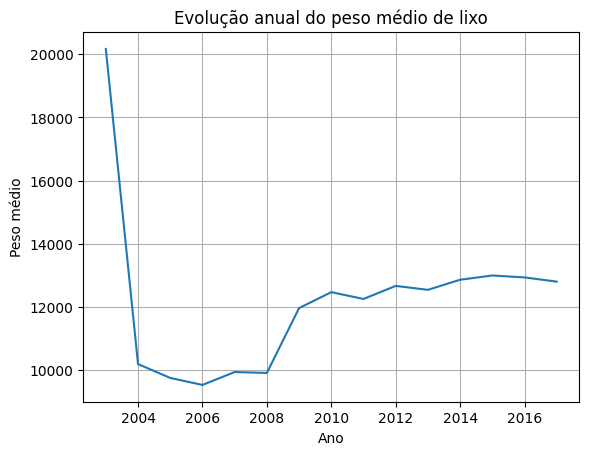

In [56]:
# Gera uma lista ordenada de inteiros que contém todos os anos da coluna "report_date" da base de dados representada pela variável "data_frame".
years_list = getYearsList(data_frame)

# Cria uma lista de nome "average_weight_per_year_list" que em conjunto com a lista "years_list" funcionarão como um dicionário
# onde "years_list" guardará as chaves e "average_weight_per_year_list" guardará os valores associados a essas chaves.
average_weight_per_year_list = getAverageWeightPerYear(data_frame)

# Gera o gráfico do peso médio anual ao longo do tempo.
createAverageWeightPerYearGraph(years_list, average_weight_per_year_list)

# Questão 4

### a) Inicialmente, leia o arquivo "EVA.csv" com nosso banco de dados, e o transforme em um Data Frame do Pandas.

### b) Agora, apresente os cinco países que mais crescem durante o período estudado. Para isso, utilize como base a coluna growthRate. Dê a taxa, os nomes e em que rank estão os países.

### c) Por fim, apresente os cinco países menos densos. Dê sua densidade, seu nome, sua área de terra e sua população total em 2023.